# Data Exploration

This section is dedicated to explore our raw scraped data and get an understanding of the most important features that contribute to a team's success.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import the cumulative_averages.csv file.

In [129]:
data_exploration_df = "csvs/cumulative_averages.csv"
df = pd.read_csv(data_exploration_df)

df.head()

,Unnamed: 0,team0,team1,winner,season,date,team0_encoded,team1_encoded,restDays_team0,restDays_team1,...,blk%_cumulative_team1,tov%_cumulative_team0,tov%_cumulative_team1,ortg_cumulative_team0,ortg_cumulative_team1,drtg_cumulative_team0,drtg_cumulative_team1,ft/fga_cumulative_team0,ft/fga_cumulative_team1,team1_winner
0,0,CLE,MIL,CLE,2018,2017-10-20,6,10,2.0,1.0,...,6.3,15.30,14.4,102.70,110.4,99.70,102.2,0.2530,0.329,0
1,1,LAL,PHO,LAL,2018,2017-10-20,25,24,0.0,1.0,...,12.1,15.80,14.2,86.90,77.0,102.00,125.6,0.1540,0.146,0
2,2,GSW,NOP,GSW,2018,2017-10-20,21,30,2.0,1.0,...,19.0,16.00,15.6,118.60,97.6,119.60,110.4,0.2380,0.304,0
3,3,ORL,BRK,BRK,2018,2017-10-20,15,4,1.0,1.0,...,2.9,12.00,15.6,110.30,115.7,103.60,123.6,0.2440,0.309,1
4,4,BOS,PHI,BOS,2018,2017-10-20,2,5,1.0,1.0,...,8.0,9.95,14.4,100.95,110.3,106.55,115.1,0.1685,0.151,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8355 non-null   int64  
 1   team0                    8355 non-null   object 
 2   team1                    8355 non-null   object 
 3   winner                   8355 non-null   object 
 4   season                   8355 non-null   int64  
 5   date                     8355 non-null   object 
 6   team0_encoded            8355 non-null   int64  
 7   team1_encoded            8355 non-null   int64  
 8   restDays_team0           8355 non-null   float64
 9   restDays_team1           8355 non-null   float64
 10  mp_cumulative_team0      8355 non-null   float64
 11  mp_cumulative_team1      8355 non-null   float64
 12  fg_cumulative_team0      8355 non-null   float64
 13  fg_cumulative_team1      8355 non-null   float64
 14  fga_cumulative_team0    

We want to go through each feature in the data to determine which stats help a team win a game. This code block looks for the times that a team won when it was better in a specific stat. For example, this means that when a team wins, it has been better in offensive rating than the opponent in 66.94% of the games. 



In [130]:
results = []
for column in df.columns[7:]:
    if 'team0' in column or "team1_winner" in column:
        continue
    
    wins_with_higher_stat = df.loc[(df[column] > df[column.replace('team1', 'team0')]) & (df['team1_winner'] == 1)].shape[0]
    
    total_games_with_higher_stat = df.loc[df[column] > df[column.replace('team1', 'team0')]].shape[0]
    
    win_percentage = (wins_with_higher_stat / total_games_with_higher_stat) * 100 if total_games_with_higher_stat > 0 else 0
    
    results.append((column, win_percentage))

# Sort the results list by win percentage in descending order
results.sort(key=lambda x: x[1], reverse=True)

# Print the results
for category, win_pct in results:
    print(f'{category}: {win_pct:.2f}%')

ortg_cumulative_team1: 66.94%
ts%_cumulative_team1: 66.08%
efg%_cumulative_team1: 65.82%
fg%_cumulative_team1: 64.52%
pts_cumulative_team1: 64.32%
trb%_cumulative_team1: 63.83%
drb_cumulative_team1: 63.22%
3p%_cumulative_team1: 62.74%
fg_cumulative_team1: 62.44%
drb%_cumulative_team1: 61.59%
3p_cumulative_team1: 61.14%
trb_cumulative_team1: 60.89%
restDays_team1: 60.60%
ast_cumulative_team1: 60.26%
ft%_cumulative_team1: 59.90%
ft/fga_cumulative_team1: 59.56%
blk%_cumulative_team1: 59.42%
ft_cumulative_team1: 59.38%
blk_cumulative_team1: 59.21%
stl%_cumulative_team1: 58.94%
stl_cumulative_team1: 58.90%
3par_cumulative_team1: 58.73%
3pa_cumulative_team1: 58.67%
ftr_cumulative_team1: 57.75%
fta_cumulative_team1: 57.56%
orb%_cumulative_team1: 57.40%
ast%_cumulative_team1: 57.24%
mp_cumulative_team1: 56.89%
team1_encoded: 55.10%
orb_cumulative_team1: 54.78%
pf_cumulative_team1: 54.53%
fga_cumulative_team1: 54.28%
tov_cumulative_team1: 53.76%
tov%_cumulative_team1: 53.47%
drtg_cumulative_tea

# Bar Graph of the different Feature

We can plot the results above as a bar graph.

In [131]:

stats_labels = []
stats_values = []

for feature, value in results:
    feature = feature.split("_") [0].upper()
    stats_labels.append(feature)
    stats_values.append(value)

stats_labels = stats_labels[:-3]
stats_values = stats_values[:-3]


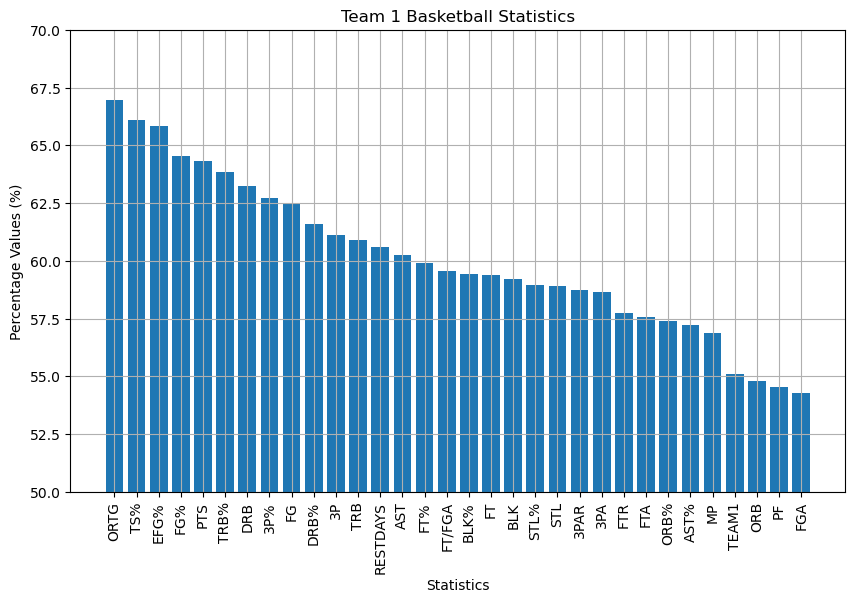

In [132]:


# Plotting
plt.figure(figsize=(10, 6))
plt.bar(stats_labels,stats_values ) 

plt.ylabel('Percentage Values (%)', size=10) 
plt.xlabel('Statistics')  
plt.title('Team 1 Basketball Statistics') 
plt.xticks(rotation=90, size=10) 
plt.ylim(50, 70)
plt.grid(True) 
plt.show() 


## Box Plot for Offensive Rating 

Text(0.5, 0, 'Game Outcome')

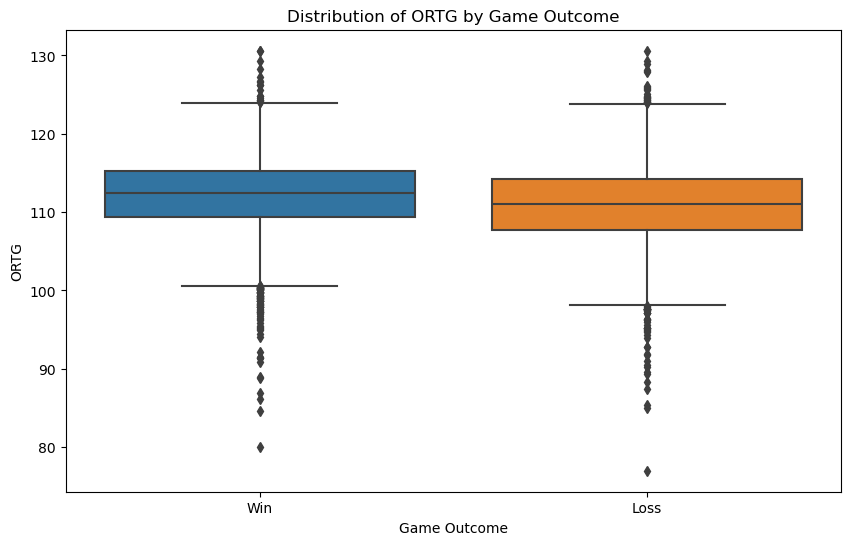

In [133]:
data_exploration_df = df.copy()
ortg_values = pd.concat([
    pd.DataFrame({'ORTG': data_exploration_df['ortg_cumulative_team0'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Loss', 0: 'Win'})}),
    pd.DataFrame({'ORTG': data_exploration_df['ortg_cumulative_team1'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Win', 0: 'Loss'})})
])

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='ORTG', data=ortg_values)
plt.title('Distribution of ORTG by Game Outcome')
plt.ylabel('ORTG')
plt.xlabel('Game Outcome')


## True Shooting Percentage

Text(0.5, 0, 'Game Outcome')

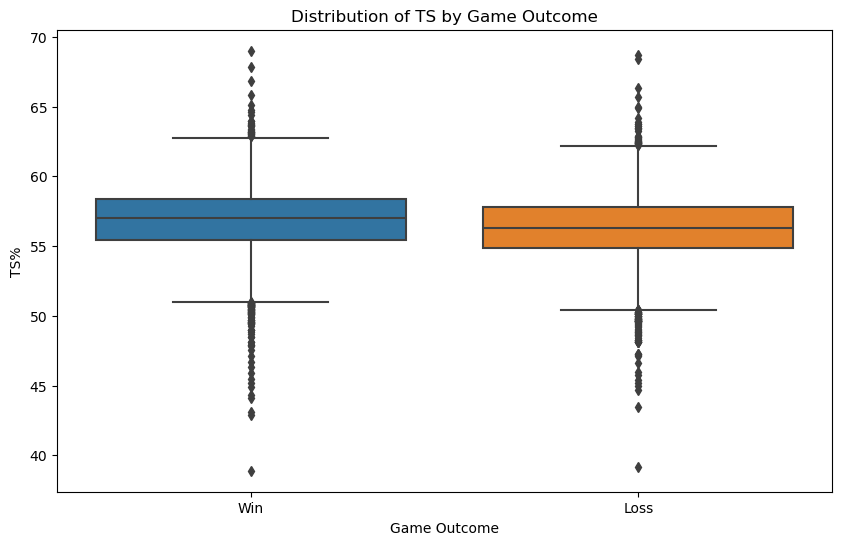

In [134]:
ts_values = pd.concat([
    pd.DataFrame({'ts%': data_exploration_df['ts%_cumulative_team0']*100, 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Loss', 0: 'Win'})}),
    pd.DataFrame({'ts%': data_exploration_df['ts%_cumulative_team1']*100, 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Win', 0: 'Loss'})})
])

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='ts%', data=ts_values)
plt.title('Distribution of TS by Game Outcome')
plt.ylabel('TS%')
plt.xlabel('Game Outcome')

## Effective Field Goal Percentage

Text(0.5, 0, 'Game Outcome')

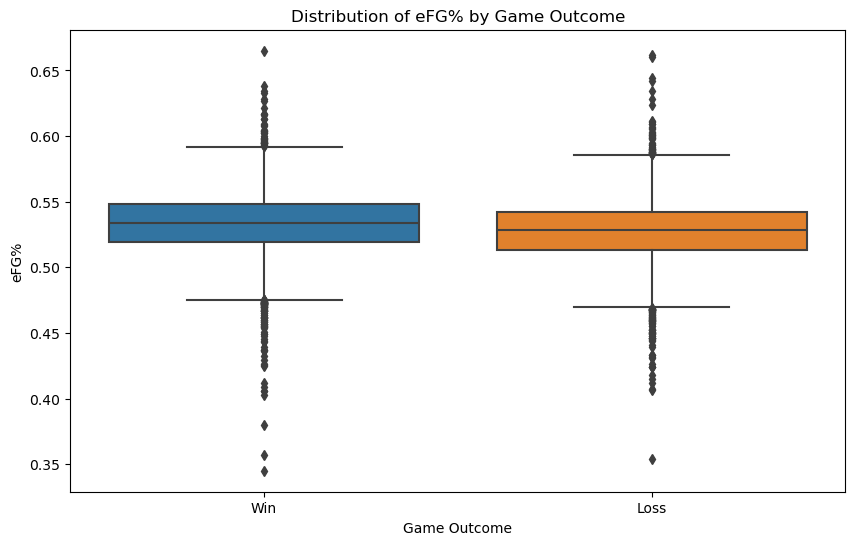

In [122]:
efg_values = pd.concat([
    pd.DataFrame({'efg%': data_exploration_df['efg%_cumulative_team0'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Loss', 0: 'Win'})}),
    pd.DataFrame({'efg%': data_exploration_df['efg%_cumulative_team1'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Win', 0: 'Loss'})})
])

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='efg%', data=efg_values)
plt.title('Distribution of eFG% by Game Outcome')
plt.ylabel('eFG%')
plt.xlabel('Game Outcome')

## Field Goal Percentage

Text(0.5, 0, 'Game Outcome')

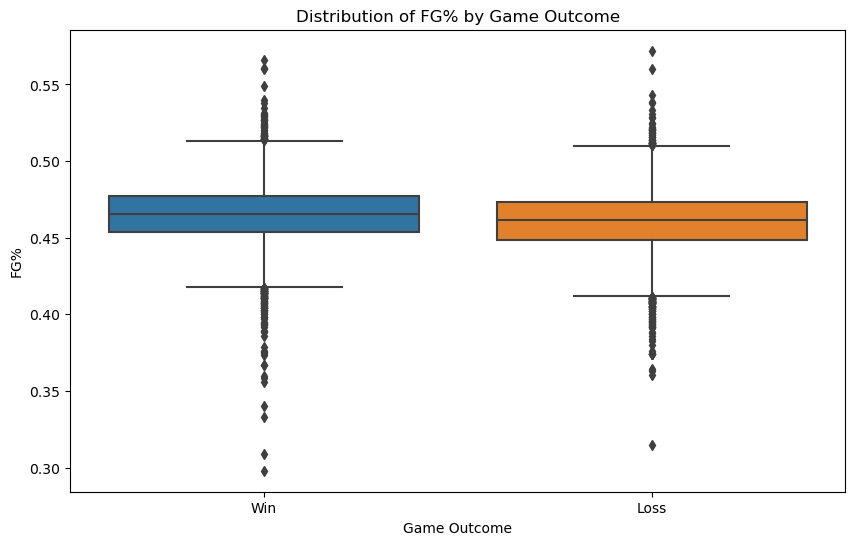

In [123]:
fg_values = pd.concat([
    pd.DataFrame({'fg%': data_exploration_df['fg%_cumulative_team0'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Loss', 0: 'Win'})}),
    pd.DataFrame({'fg%': data_exploration_df['fg%_cumulative_team1'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Win', 0: 'Loss'})})
])

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='fg%', data=fg_values)
plt.title('Distribution of FG% by Game Outcome')
plt.ylabel('FG%')
plt.xlabel('Game Outcome')

## Points Average 

Text(0.5, 0, 'Game Outcome')

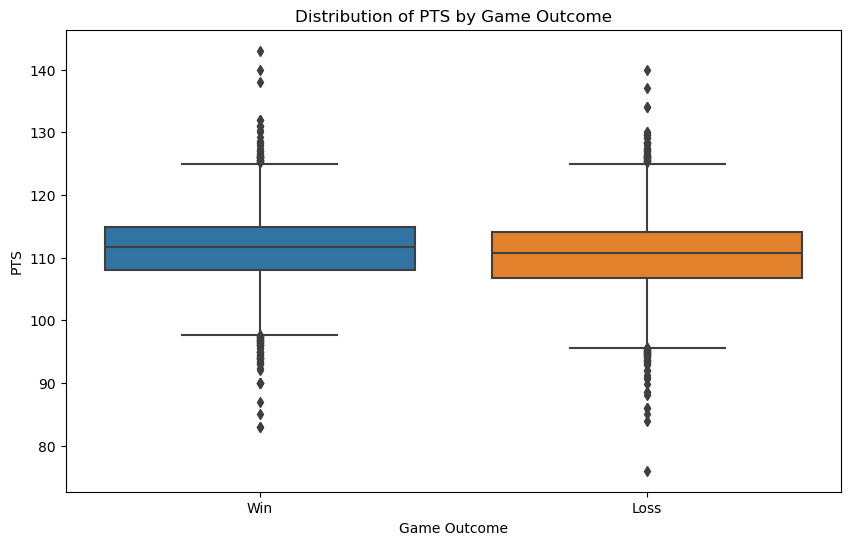

In [135]:


pts_values = pd.concat([
    pd.DataFrame({'pts': data_exploration_df['pts_cumulative_team0'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Loss', 0: 'Win'})}),
    pd.DataFrame({'pts': data_exploration_df['pts_cumulative_team1'], 'Outcome': data_exploration_df['team1_winner'].replace({1: 'Win', 0: 'Loss'})})
])

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='pts', data=pts_values)
plt.title('Distribution of PTS by Game Outcome')
plt.ylabel('PTS')
plt.xlabel('Game Outcome')